# **Comparing catigorical predictions between deep learning and machine learing models.**

---



Table of content



*   [Introduction](#intro)
*   [Data source](#DS)
      *   [Attribute Information](#AI)
*   [Data Preparation](#DP)
*   [Deep learning models](#DL)
      *   [Model 1](#ML1)
      *   [Model 2](#ML2)
      *   [Model 3](#ML3)
      *   [Model 4](#ML4)
*   [Machine Learning Models](#ML)
*   [Conclusion/Observation](#conclusion)



















### Introduction <a name="intro"></a>

The aim of this project is to compare the accuracy of deep learning models to simple traditional machine learning models, in predicting the catigorical output from a large data set.


### Data Source. <a name="DS"></a>

The data used for this project was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


### Attribute Information. <a name="AI"></a>

A detailed breakdown of all the attributes in the data set can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

### Data preparation. <a name="DP"></a>

In [55]:
#loading of the required libraries
import pandas as pd
import pydot as pyd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['bank-full.csv']),sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Viewing the number of rows and columns as well as investigating any null or NA values

In [4]:
df.shape

(45211, 17)

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

There are a total of 17 columns to work with.

In [8]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


I will now use sklearn ordinal encoder to transform several of the catigoriacl columns into numeric values.

In [10]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
columns_enc = OrdinalEncoder()
binary_columns = columns_enc.fit_transform(df[['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','y' ]])

In [11]:
df[['JOB','Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact','Month','Poutcome','Y']] = binary_columns

df1 = df.drop(['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','y'], axis=1)


The new data set now contains only numeric values.

In [12]:
df1

,age,balance,day,duration,campaign,pdays,previous,JOB,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome,Y
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45207,71,1729,17,456,2,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45208,72,5715,17,1127,5,184,3,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,1.0
45209,57,668,17,508,4,-1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0


In [13]:
#checking for any null values# 
df1.isnull().any().any()

False

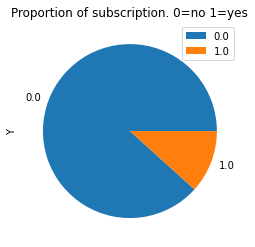

In [14]:
Subscribe_rate = pd.DataFrame(df1.Y.value_counts())
Subscribe_rate.plot(y='Y',kind='pie', title="Proportion of subscription. 0=no 1=yes")


For the representation above we notice that the majority of respondents responded "No".

Now we form the feature and targer data set. The target will be the yes/no respondents while our feature set will contain values for ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome'].

In [56]:
X = df1.drop("Y", axis=1)
Y = df1[['Y']]

In [16]:
X.head(1)

,age,balance,day,duration,campaign,pdays,previous,JOB,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0


In [17]:
#normalization of X#
Xn= preprocessing.StandardScaler().fit(X).transform(X)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xn,Y, test_size=0.3, random_state=4)

### Deep Learning Models. <a name="DL"></a>

### Model 1. <a name="ML1"></a>
This will be a very basic neural network with just 1 hidden layer.

In [19]:
#A simple neural network#
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(16,)))
model1.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(2) )
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               6800      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 47,102
Trainable params: 47,102
Non-trainable params: 0
_________________________________________________________________


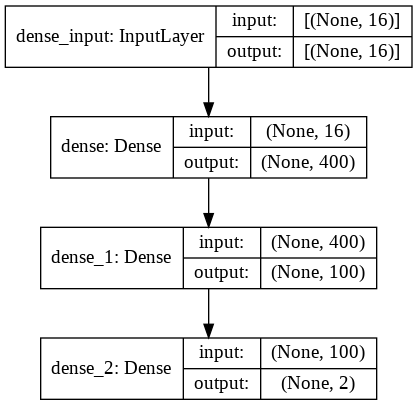

In [20]:
tf.keras.utils.plot_model(model1, 'model.png', show_shapes=True)

Here we see a diagram of our network.

In [21]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

Here the model is trained for 400 epochs.

In [ ]:
history = model1.fit(x=X_train, y=Y_train,batch_size=32,epochs=400, verbose=1)

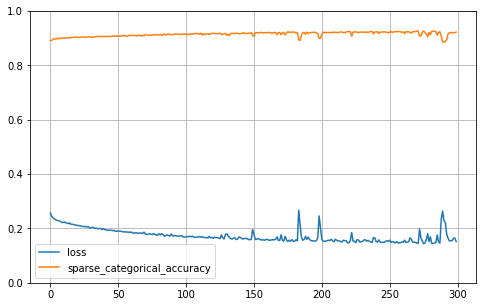

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


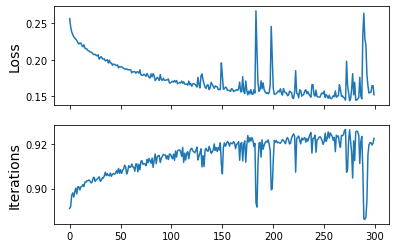

In [24]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values)
plt.show()

In [25]:
m0 = model1.evaluate(X_train, Y_train)
print("Accuracy on train data =",m0)

m1 = model1.evaluate(X_test, Y_test)
print("Accuracy on test data =",m1)


989/989 [==============================] - 1s 1ms/step - loss: 0.1416 - sparse_categorical_accuracy: 0.9256
Accuracy on train data = [0.14155183732509613, 0.9255853891372681]
424/424 [==============================] - 1s 1ms/step - loss: 0.6075 - sparse_categorical_accuracy: 0.8837
Accuracy on test data = [0.6075162887573242, 0.8836626410484314]


Model 1 had an accuracy of 88% on test data.

### Model 2. <a name="ML2"></a>

Here we use a singlt input deep and wide network.

In [26]:
#slightly more complex second model#
input=tf.keras.layers.Input(shape=[16])
hiddenA= tf.keras.layers.Dense(400, activation=tf.nn.relu)(input)
hiddenB = tf.keras.layers.Dense(100, activation=tf.nn.relu)(hiddenA)
concat = tf.keras.layers.Concatenate()([input,hiddenB])
output = tf.keras.layers.Dense(2)(concat)
model2 = tf.keras.models.Model(inputs=[input], outputs=[output])

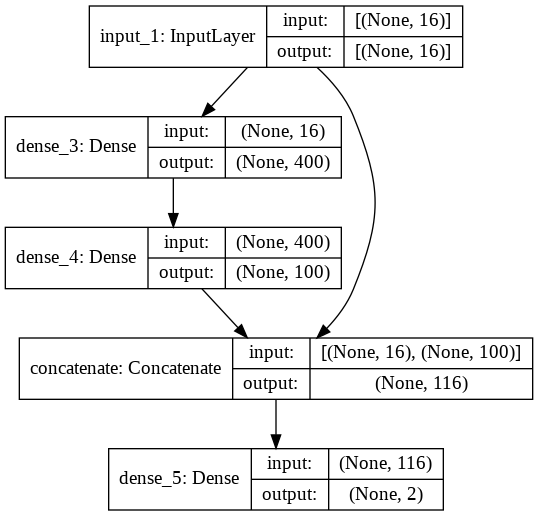

In [27]:
tf.keras.utils.plot_model(model2, 'model.png', show_shapes=True)

In [28]:

model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history2 = model2.fit(x=X_train, y=Y_train,batch_size=32,epochs=400, verbose=1)

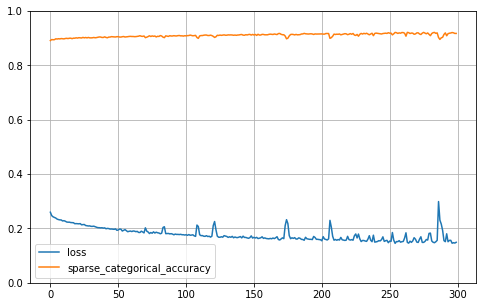

In [30]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

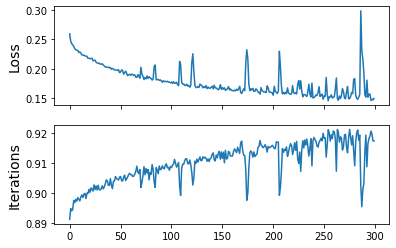

In [31]:
history_dict = history2.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values)
plt.show()

In [32]:
m2 = model2.evaluate(X_train, Y_train)
print("Accuracy on train data =",m2)

m3 = model2.evaluate(X_test, Y_test)
print("Accuracy on test data =",m3)

989/989 [==============================] - 1s 1ms/step - loss: 0.1561 - sparse_categorical_accuracy: 0.9202
Accuracy on train data = [0.15609298646450043, 0.9202135801315308]
424/424 [==============================] - 1s 1ms/step - loss: 0.7876 - sparse_categorical_accuracy: 0.8857
Accuracy on test data = [0.7875885367393494, 0.8857269287109375]


Our accuracy remained relatively the same.

### Model 3. <a name="ML3"></a>

Here we use the deep and wide model but different feature subsets are sent to different parts of the network

In [33]:
#model 3#

input_AX = tf.keras.layers.Input(shape=[8])
input_BX = tf.keras.layers.Input(shape=[16])
hidden1X = tf. keras.layers.Dense(30, activation=tf.nn.relu)(input_BX)
hidden2X = tf.keras.layers.Dense(30, activation=tf.nn.relu)(hidden1X)
concatX = tf.keras.layers.concatenate([input_AX, hidden2X])
outputX = tf.keras.layers.Dense(2)(concatX)
model3 = tf.keras.models.Model(inputs=[input_AX, input_BX], outputs=[outputX])


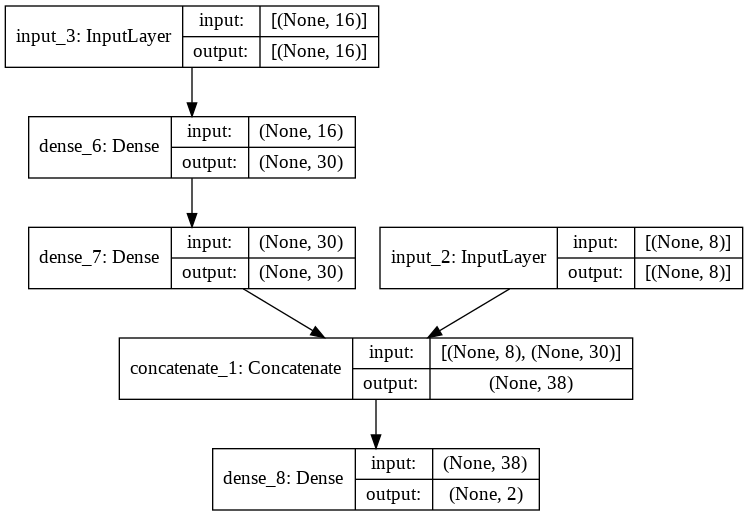

In [34]:
tf.keras.utils.plot_model(model3, 'model.png', show_shapes=True)

In [35]:

model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [36]:
X_train_aa, X_train_bb = X_train[:,:8], X_train
X_testtt, X_tess = X_test[:,:8], X_test


Different train and test splits are needed because the network is feed with multiple input feature sets.

In [ ]:
history3 = model3.fit(x=[X_train_aa,X_train_bb], y=Y_train,batch_size=32,epochs=400, verbose=1)

In [38]:
model3.evaluate([X_testtt, X_tess], Y_test)

424/424 [==============================] - 1s 1ms/step - loss: 0.2416 - sparse_categorical_accuracy: 0.8981


[0.24164502322673798, 0.8981126546859741]

Model 3 produced a slightly better accuracy.

### Model 4. <a name="ML4"></a>

Here we try a more complex deep wide structure with multiple feature input subsets. The idea behind this is to pass the simplier binary columns directly to the concat layer while the other columns will be passed deeper into the network. We'll test to see whether this has an impact on the accuracy.

In [39]:
#house, loan, default#
In_1 = tf.keras.layers.Input(shape=[11])
In_2 = tf.keras.layers.Input(shape=[12])
In_3 = tf.keras.layers.Input(shape=[13])
In_4 = tf.keras.layers.Input(shape=[16])


H1 = tf.keras.layers.Dense(400, activation=tf.nn.relu)(In_2)
H2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1)

H1a = tf.keras.layers.Dense(400, activation=tf.nn.relu)(In_1)
H2a = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1a)

H1b = tf.keras.layers.Dense(400, activation=tf.nn.relu)(In_3)
H2b = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1b)

concat2 = tf.keras.layers.concatenate([In_4, H2a, H2, H2b])
output2 = tf.keras.layers.Dense(2)(concat2)
model4 = tf.keras.models.Model(inputs=[In_1, In_2, In_3, In_4], outputs=[output2])


In [40]:
X_train_11, X_train_12 , X_train_13, X_train_full = X_train[:,:11], X_train[: ,:12], X_train[:,:13], X_train
X_test_11, X_test_12 , X_test_13, X_test_full = X_test[:,:11], X_test[: ,:12], X_test[:,:13], X_test

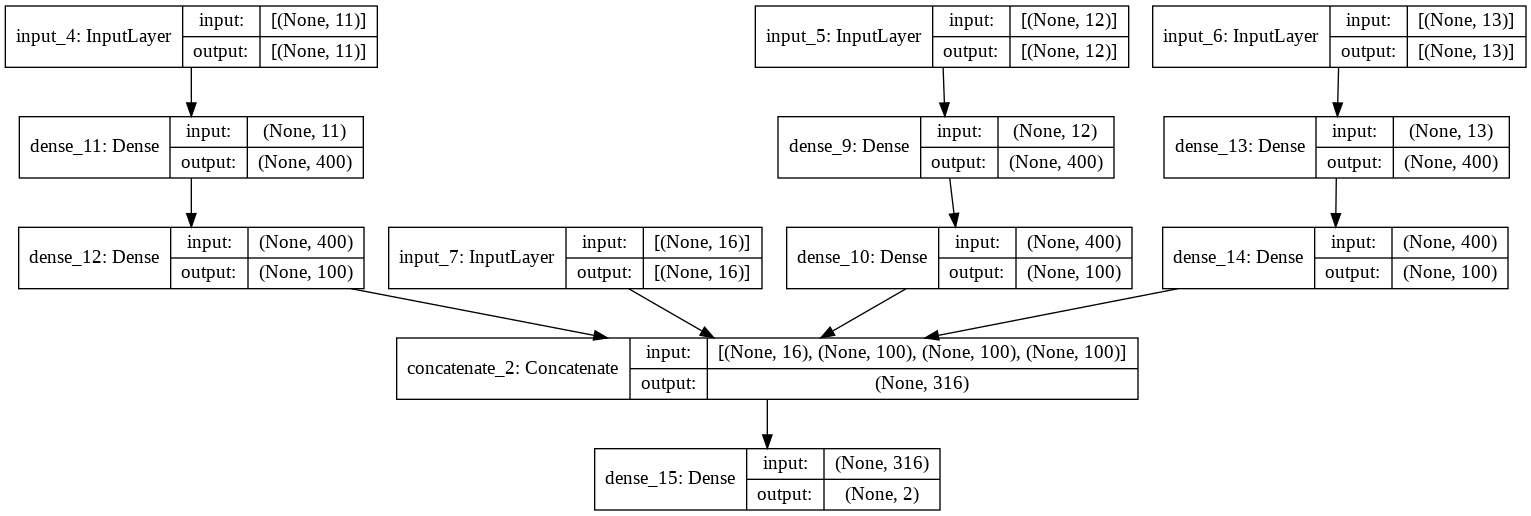

In [57]:
tf.keras.utils.plot_model(model4, 'model.png', show_shapes=True)

A more complex network design.

In [42]:

model4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history4 = model4.fit(x=[X_train[:,:11], X_train[: ,:12], X_train[:,:13], X_train],y=Y_train,batch_size=32,epochs=400, verbose=1)

In [44]:
model4.evaluate([X_test_11, X_test_12 , X_test_13, X_test_full], Y_test)

424/424 [==============================] - 1s 2ms/step - loss: 0.4570 - sparse_categorical_accuracy: 0.8932


[0.45697513222694397, 0.893173098564148]

Model 4 did not produce any noticable change in accuracy. Both model 3 and Model 4 achieved 89% on the test data. 
The change in architecture didn't seem to negatively impact the overall accuracy.

---



### Machine learning models. <a name="ML"></a>

Here we will test the accuracies of

*   Random forest
*   Support vector machine (SVM)
*   Logistic regression
*   Hard voting classifier
*   Soft voting classifier






In [49]:
#reshaping the y training set#
y_train = np.array(Y_train)
y_train = y_train.ravel()

y_test = np.array(Y_test)
y_test = y_test.ravel()

In [52]:
#loading our predictive models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)


voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [53]:
#testing model accuracy

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf_soft, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8942789737540549
RandomForestClassifier 0.9013565319964613
SVC 0.9027572987319374
VotingClassifier 0.903420819817163
VotingClassifier 0.9029047478619876


All 5 of the ML models generally slightly better than the neural network models. Overall there is a 1% increase in the accuracy scores.

### Conclusion/Observations <a name="conclusion"></a>

We observed that the ML models had an overall 1% increase in accuracy over the neural network models. Neural networks work best with larger datasets so this is one of the reasons why this one was chosen with over 45 thousand rows. Perhaps the slightly lower score may be due to:
1.   The need for a better designed network architecture.
2.   A more optimal training epoch number. Perhaps an increase or decrease might have produced better results.
1.   The activation function might not have been the most optimal for this data set.

As this is a work in progress, I will revisit this notebook in hopes of getting an even better accuracy score.

Any suggestions on a different network architecture would also be appreciated :).




